In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gentle start with one dimensional data

Let us consider a set $Y$ of point on the real line:  1, 3, 7, 2.

**Question** Create a 1d-array `Y` for these values

In [2]:
Y = np.array([1, 3, 7, 2])
print(Y)

[1 3 7 2]


We want to calculate all pairs of distances involving elements of $Y$. It will be stored in a matrix  `M` such that  `M[i,j] = Y[i] - Y[j]` for `i` and `j` in `Y`. We will use broadcasting for that!

**Question** Create a (4, 1) matrix `a` and a (1, 4) matrix `b` containing `Y` and `Y.T`.

In [7]:
a = Y.reshape((4, 1))
b = Y.reshape((1, 4))
print(a)
print(b)


[[1]
 [3]
 [7]
 [2]]
[[1 3 7 2]]


**Question** Try 

    np.arange(5)[:, np.newaxis]
    
Use that trick to create `a` and `b`! 

In [12]:
a = Y[:, np.newaxis]
print(a)

[[1]
 [3]
 [7]
 [2]]


In [13]:
b = Y[np.newaxis, :]
print(b)

[[1 3 7 2]]


**Question** Observe the value of `a - b`. Read the [documentation of broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and describe what numpy did to calculate `a-b`. 

In [15]:
M = a - b
print(M)

[[ 0 -2 -6 -1]
 [ 2  0 -4  1]
 [ 6  4  0  5]
 [ 1 -1 -5  0]]


*Answer* : NumPy uses broadcasting when we compute a-b so the output shape is (4, 4)

**Question** Compute the square of this matrix `a-b` in `dsquared`.

In [17]:
dsquared = M**2
print(dsquared)

[[ 0  4 36  1]
 [ 4  0 16  1]
 [36 16  0 25]
 [ 1  1 25  0]]


**Question** Read the documentation of [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) and try this example 

    np.argsort(np.array([1, 0, 12, 2]))
    
Why do you have 1, 0, 3, 2 as a result? 

*Answer*: argsort return the indices that would sort an array, in [1, 0, 12, 2], '1' whould be at index 1, '0' at index 0, '12' at 3, '2' at 2

**Question** Use `argsort` on `dsquared` to obtain a matrix such that for each line $i$ you have the indexes of points ordered by the squared distance to point $i$.   

In [21]:
sorted_indices = np.argsort(dsquared, axis=1)
print(sorted_indices)

[[0 3 1 2]
 [1 3 0 2]
 [2 1 3 0]
 [3 0 1 2]]


# In 2 dimensions... 

**Question** Sample uniformly 10 points in $[0,1]^2$. (Hint: Use `np.random.rand`). Store the result in `X`.

In [23]:
X = np.random.rand(10, 2)
print(X)

[[0.55104512 0.47225216]
 [0.77124534 0.59177934]
 [0.80339583 0.38789127]
 [0.0559893  0.98267707]
 [0.43231909 0.08874858]
 [0.86805926 0.81893134]
 [0.63822838 0.50296097]
 [0.89537313 0.5227525 ]
 [0.35213725 0.94007194]
 [0.62394185 0.49795527]]


**Question** Draw the points on a diagram.

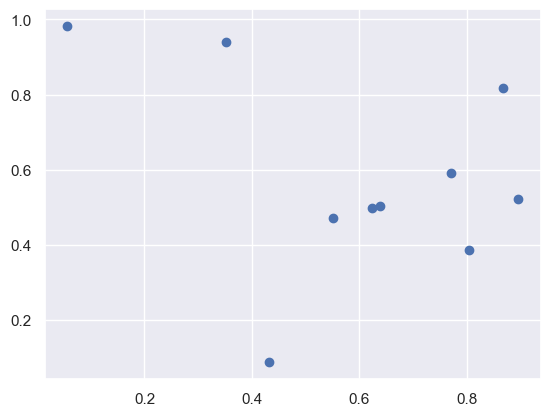

In [24]:
plt.scatter(X[:,0], X[:,1])

Note the meaning of each axis in `X`. The first axis (rows) is the index of a point in the set (the first row is the first point). The second axis is the index of the coordinates (The first column is the first coordinate, ie the x-axis; The second column is the second coordinate, ie the y-axis) 

**Question** Now create `a` and `b` by adding a third axis using `np.newaxis` at the right position so that 

$$a[i, j, k] - b[i, j, k] = X[i, k] - X[j, k]$$

Hint: As you can see in this expression, $i$ and $j$ are indexes of points and $k$ is the index of a coordinate. Broacasting will help to stretch the axis that corresponds to indexes of points...

In [28]:
a = X[:, np.newaxis, :]
b = X[np.newaxis, :, :]
print(a.shape)
print(b.shape)
print(a-b)

(10, 1, 2)
(1, 10, 2)
[[[ 0.          0.        ]
  [-0.22020022 -0.11952717]
  [-0.2523507   0.08436089]
  [ 0.49505583 -0.5104249 ]
  [ 0.11872603  0.38350359]
  [-0.31701413 -0.34667918]
  [-0.08718326 -0.0307088 ]
  [-0.34432801 -0.05050034]
  [ 0.19890787 -0.46781978]
  [-0.07289673 -0.0257031 ]]

 [[ 0.22020022  0.11952717]
  [ 0.          0.        ]
  [-0.03215049  0.20388806]
  [ 0.71525604 -0.39089773]
  [ 0.33892625  0.50303076]
  [-0.09681392 -0.22715201]
  [ 0.13301696  0.08881837]
  [-0.12412779  0.06902683]
  [ 0.41910809 -0.34829261]
  [ 0.14730349  0.09382407]]

 [[ 0.2523507  -0.08436089]
  [ 0.03215049 -0.20388806]
  [ 0.          0.        ]
  [ 0.74740653 -0.59478579]
  [ 0.37107673  0.2991427 ]
  [-0.06466343 -0.43104007]
  [ 0.16516745 -0.1150697 ]
  [-0.0919773  -0.13486123]
  [ 0.45125858 -0.55218067]
  [ 0.17945398 -0.11006399]]

 [[-0.49505583  0.5104249 ]
  [-0.71525604  0.39089773]
  [-0.74740653  0.59478579]
  [ 0.          0.        ]
  [-0.3763298   0.89

**Question** Now you can calculate in `dsquared_coord` the squared value of the difference on each coordinate of all pairs of points. 

In [ ]:
dsquared_coord = (a - b)**2

**Question** It is now easy to compute with `sum` the squared distance between each pair of points! This is `dsquared`. It is a (10, 10) matrix...

In [34]:
dsquared = dsquared_coord.sum(axis=2)
print(dsquared.shape)

(10, 10)


**Question** Now use `np.argsort` to get a (10, 10) matrix `nn` that indicates in row $i$ the indices of points that are the closest to point $i$. 

In [36]:
nn = np.argsort(dsquared, axis=1)
print(nn.shape)
print(nn)

(10, 10)
[[0 9 6 1 2 7 4 5 8 3]
 [1 7 6 9 2 5 0 8 4 3]
 [2 7 6 1 9 0 5 4 8 3]
 [3 8 0 9 6 1 5 2 7 4]
 [4 0 9 6 2 1 7 5 8 3]
 [5 1 7 6 9 2 0 8 3 4]
 [6 9 0 1 2 7 5 4 8 3]
 [7 1 2 6 9 5 0 4 8 3]
 [8 3 0 9 6 5 1 7 2 4]
 [9 6 0 1 2 7 5 4 8 3]]


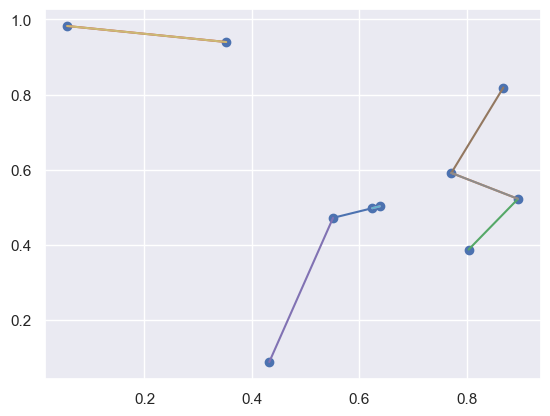

In [41]:
plt.scatter(X[:, 0], X[:, 1])
for i in range(10):
    p = np.vstack([X[i, :], X[nn[i, 1]]])
    plt.plot(p[:,0], p[:,1])